# Deep Learning: Convolutional Neural Network

## Develop A Neural Network That Can Read Handwriting

### Importing the libraries

In [2]:
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers  import  Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

### Loading data using Keras Dataset library

In [3]:
(x_train,y_train),(x_test,y_test)=load_data()

11490434/11490434 [==============================] - 2s 0us/step


### Changing data into Gray Scale

In [7]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [8]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)
(60000,)
(10000,)


In [9]:
x_trains=x_train.astype('float32')/255.0
x_tests=x_test.astype('float32')/255.0
print(x_trains.shape)
print(x_tests.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


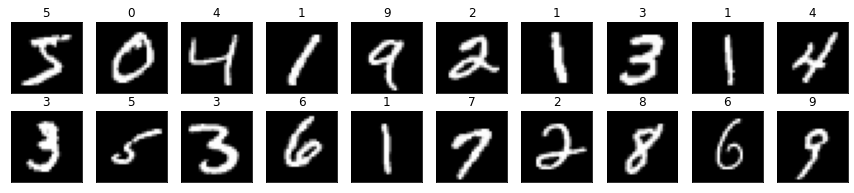

In [10]:
fig=plt.figure(figsize=(15,3))
for i in range(20):
  ax=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_train[i]),cmap='gray')
  ax.set_title(y_train[i])

In [11]:
x=x_trains.shape[1:]

### Creating Model

In [12]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(10,activation="Softmax"))

In [13]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [14]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_trains,y_train,epochs=10,batch_size=32,validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 31s 17ms/step - loss: 0.3156 - accuracy: 0.9019 - val_loss: 0.0702 - val_accuracy: 0.9772
Epoch 2/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.1230 - accuracy: 0.9630 - val_loss: 0.0519 - val_accuracy: 0.9858
Epoch 3/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0924 - accuracy: 0.9721 - val_loss: 0.0529 - val_accuracy: 0.9857
Epoch 4/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0764 - accuracy: 0.9773 - val_loss: 0.0504 - val_accuracy: 0.9857
Epoch 5/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0657 - accuracy: 0.9804 - val_loss: 0.0390 - val_accuracy: 0.9888
Epoch 6/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.0583 - accuracy: 0.9821 - val_loss: 0.0432 - val_accuracy: 0.9887
Epoch 7/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.0527 - accuracy: 0.9838 - val_loss: 0.0412 -

### Plotting Accuracy of Model

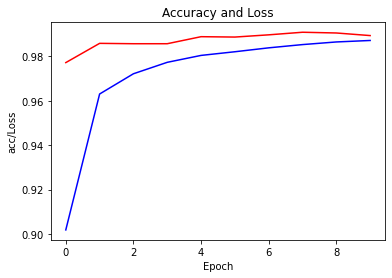

In [18]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['accuracy'],label='acc', color = 'blue')
plt.plot(history.history["val_accuracy"],label='val',  color = 'red')
plt.show()

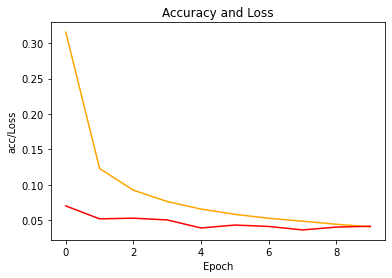

In [19]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['loss'],label='acc', color = 'orange')
plt.plot(history.history["val_loss"],label='val', color = 'red')
plt.show()

### Testing Our Model

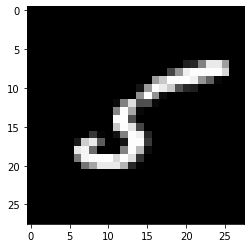

In [28]:
image=x_trains[11]
plt.imshow(np.squeeze(image),cmap="gray")


In [32]:
image=image.reshape(-1,28,28,1)
pred=model.predict([image])
np.argmax(pred)

1/1 [==============================] - 0s 43ms/step


5

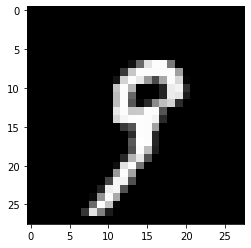

In [33]:
image1 = x_trains[19]
plt.imshow(np.squeeze(image1),cmap="gray")

In [31]:
image1=image1.reshape(-1,28,28,1)
pred=model.predict([image1])
np.argmax(pred)

1/1 [==============================] - 0s 37ms/step


9